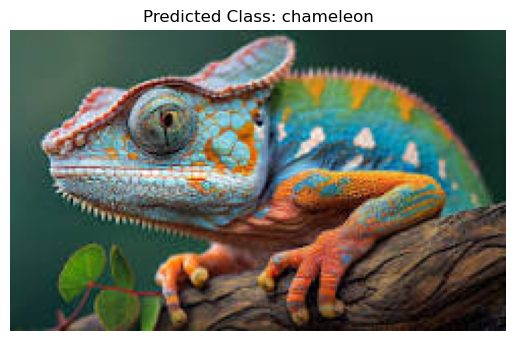

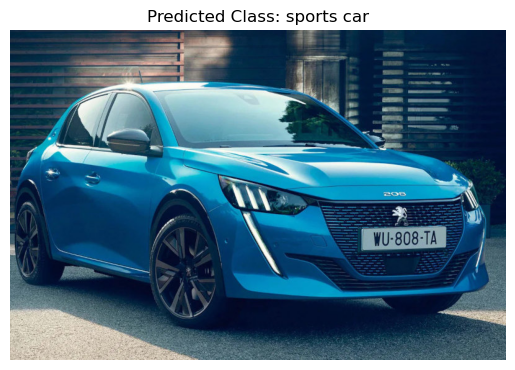

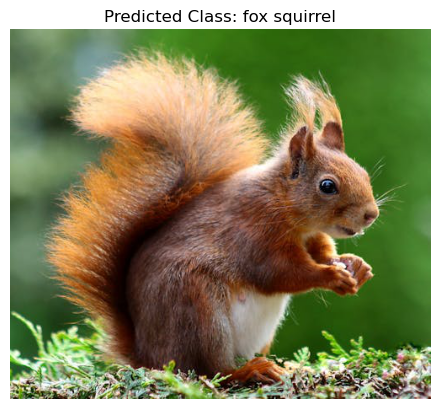

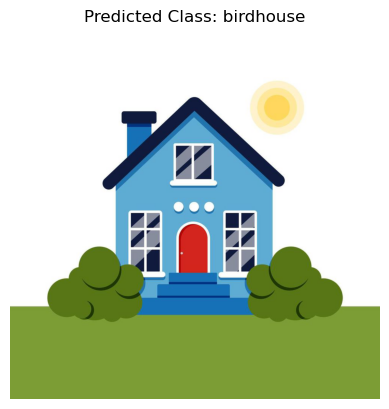

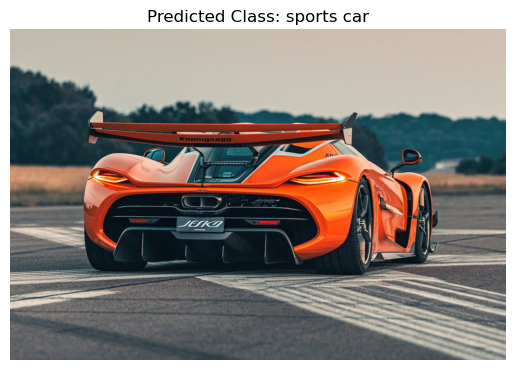

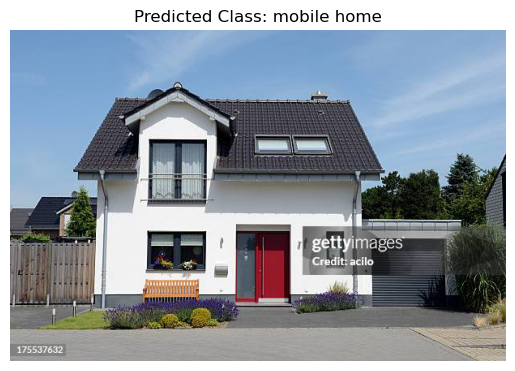

In [6]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import os
import json

# Step 1: Load the Pre-trained Model
model = models.resnet18(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Path to the folder containing images and the label JSON file
image_folder_path = "/Users/mac/Desktop/MST AISD/S3/Transfert Learning/TP/deep_learning/CNN/Images"
label_file_path = "/Users/mac/Desktop/MST AISD/S3/Transfert Learning/TP/deep_learning/CNN/labels.json"

# Step 2: Load the Label Mapping
with open(label_file_path, "r") as f:
    labels = json.load(f)

# Step 3: Define Preprocessing Transformations
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Step 4: Make Prediction Function
def predict(model, image_tensor):
    with torch.no_grad():
        outputs = model(image_tensor)
    # Get the top-1 predicted class
    _, predicted_class = outputs.max(1)
    return predicted_class.item()

# Step 5: Loop Through Each Image in the Folder
for image_name in os.listdir(image_folder_path):
    # Construct the full path to the image
    image_path = os.path.join(image_folder_path, image_name)
    
    # Check if the path is a file and has a valid image extension
    if os.path.isfile(image_path) and image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Load the image
        img = Image.open(image_path).convert("RGB")
        
        # Preprocess the image
        img_tensor = preprocess(img).unsqueeze(0)  # Add batch dimension
        
        # Make prediction
        predicted_index = predict(model, img_tensor)
        
        # Map the predicted index to the actual label name
        predicted_label = labels[predicted_index] if predicted_index < len(labels) else "Unknown"
        
        # Display the image and prediction
        plt.imshow(img)
        plt.title(f"Predicted Class: {predicted_label}")
        plt.axis('off')
        plt.show()
